# Άσκηση 3 (Κτενά) - Μαγνητικά Υλικά - 2022-23
#### Ηλιόπουλος Γεώργιος - 03118815

Consider an isolated, single domain, ellipsoid, uniformly magnetized magnetic nanoparticle, with uniaxial anisotropy Ku, at Τ=0K

H is applied at angle θ to easy axis <br>
M lies at angle φ to easy axis

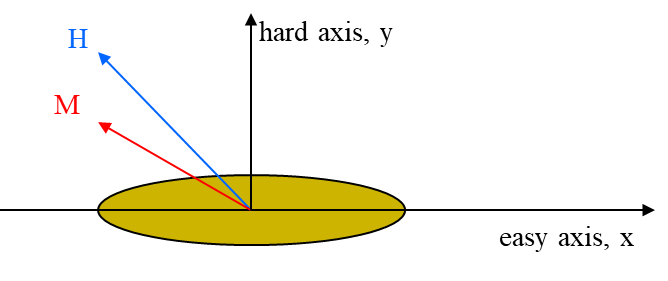

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

In [2]:
H_norm = np.arange(-1.1,1.2,0.1)
H = np.round_(H_norm, decimals = 1)

theta = np.array([0, 10, 20, 30, 45, 60, 70, 80, 90])
theta = theta * np.pi / 180

>Making a function that finds the angles theta of the magnetization for different applied fields. 

To find the angle of the magnetization we can solve the equation $h_yk^4+2(h_x-1)k^3+2(h_x+1)-h_y=0$. At first there are 2 or 4 real solutions. For the first value, knowing that we strt to apply the field from negative to positive values we keep an initial angle. Then we compare the value with the previous one and we keep the closest one. We do this as long as $h_x^{2/3} + h_y^{2/3} < 1$, then the magnetization flips orientation according to the picture below.

![gif alt >](https://user-images.githubusercontent.com/106864601/218151993-a7d12314-5a2f-4de6-aa54-f19fc8cd6fd9.gif)

As we can see below in position A, B and C the magnetization follows the field but in situation D the switching criterion is activated and the magnetization flips.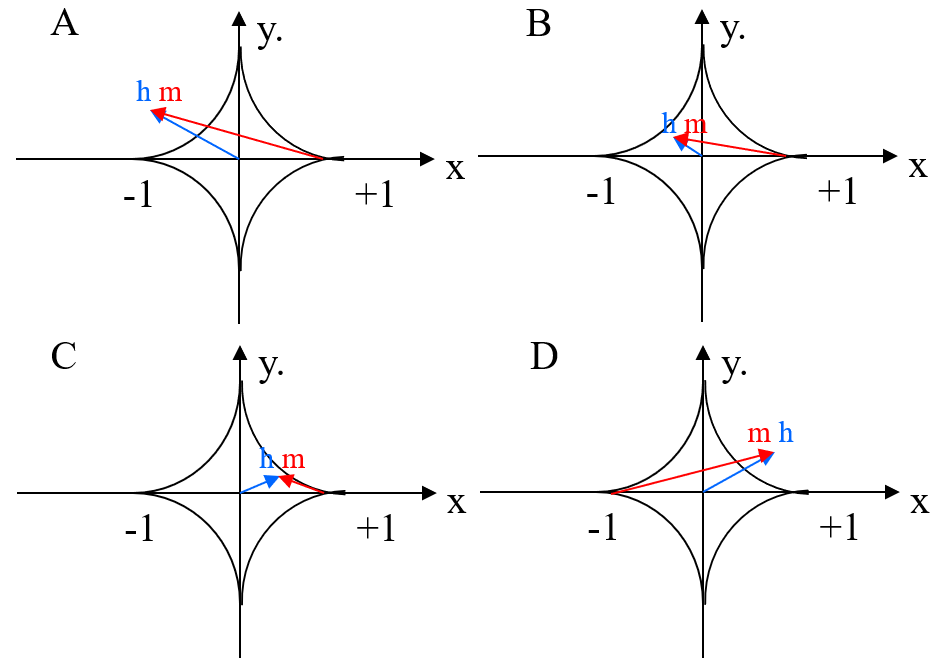

In [3]:
def solutions(theta):
    
    #the solutions k=tan(phi/2)
    sol1 = []
    for i in range(len(H)):
        hx = H[i] * np.cos(theta)
        hy = H[i] * np.sin(theta)
        p = [hy, 2 * (hx - 1), 0, 2 * (hx + 1), -hy]
        sol1.append(np.roots(p))
    
    #keeping the real ones   
    sol2 = []
    for i in range(len(sol1)):
        sol2.append(sol1[i][np.isreal(sol1[i])])
        
    #extracting phi = 2 * arctan(k)
    sol3 = []
    for i in range(len(sol1)):
        sol3.append(2 * np.arctan(np.real(sol2[i])))
        
    arr = np.array(sol3)
    sign = -1

    final = [[]]*len(H)

    for i in range(len(sol3)):

        if(i<=18):
            if(((np.abs(H[i]) * np.cos(theta))**(2/3) + (np.abs(H[i]) * np.sin(theta))**(2/3)) >= 1 and\
               (H[i] * np.cos(theta)) >= 0):

                sign = 1

        if(H[i] == 0):
            newlist = [np.pi]

        else:
            newlist = [x for x in arr[i] if np.sign(np.cos(float(x))) == sign]

            newlist = np.array(newlist, dtype = np.float32)

            newlist = [newlist[np.argmax(np.abs(np.cos(newlist)))]]

        final[i] = newlist
        
    cosines = []
    for i in range(len(final)):
        cosines.append(np.cos(final[i][0] - theta))

    symmetric_cos = []
    for i in range(len(cosines)):
        symmetric_cos.append(-cosines[(len(H)-1)-i])  
        
    return(final, cosines, symmetric_cos)

Solutions for field applied in 0° and 90° need special treatment as the can come right from the initial equation $h_xcos(φ) + h_ysin(φ) + cos(φ)sin(φ)=0$.

In [4]:
#solution for 0
H_norm0 = np.arange(-1.1,1.2,0.01)
H0 = np.round_(H_norm0, decimals = 1)

final0 = []
cosines0 = []
symmetric_cos0 = []

for i in range(len(H0)):
    #starting from negative field
    if H0[i] > 1 and H0[i] > 0:
        final0.append(0)
        cosines0.append(1)
        
    else:
        final0.append(np.pi)
        cosines0.append(-1)

symmetric_cos0 = []
for i in range(len(cosines0)):
    symmetric_cos0.append(-cosines0[(len(H0)-1)-i])

In [5]:
#solution for 90

sines90 = []

for i in range(len(H)):
    #starting from negative field
    if H[i] <= -1:
        sines90.append(-1)
        
    if H[i] >= 1:
        sines90.append(1)
    
    if H[i] > -1 and H[i] < 1:
        sines90.append(H[i])
        
sin90 = np.array(sines90)
final90 = np.arcsin(sin90)

Plotting all the hysterisis loop in one plot.

C:\Users\grgsl\AppData\Local\Temp\ipykernel_16744\3219062638.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(sol3)


Text(0, 0.5, 'm(H)')

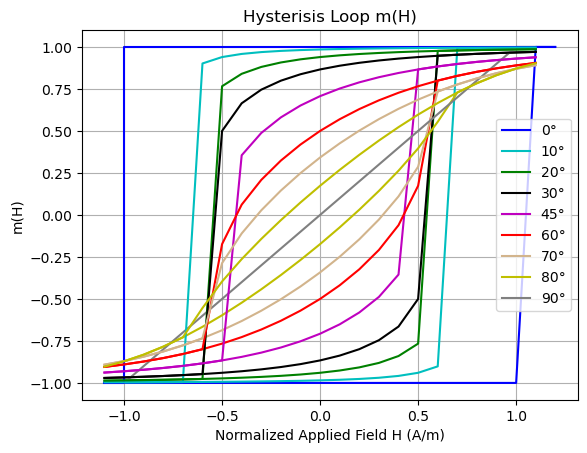

In [6]:
color = ['b', 'c', 'g', 'k', 'm', 'r', 'tan', 'y', 'grey']

plt.plot(H0, cosines0, color[0])

for i in range(7):
    final, cosines, symmetric_cos = solutions(theta[i+1])
    hx = H * np.cos(theta[i+1])
    plt.plot(H,cosines, color[i+1])
    
plt.plot(H, sines90, color[8])
plt.legend(['0°', '10°', '20°', '30°', '45°', '60°', '70°', '80°', '90°'])

plt.plot(H0, symmetric_cos0, color[0])

for i in range(7):
    final, cosines, symmetric_cos = solutions(theta[i+1])
    hx = H * np.cos(theta[i+1])
    plt.plot(H,symmetric_cos, color[i+1])

plt.grid()
plt.xlabel("Normalized Applied Field H (A/m)");
plt.title('Hysterisis Loop m(H)');
plt.ylabel('m(H)')

>Below we can see how the above function works in steps for theta = 45°.

In [7]:
theta45 = theta[4]

In [8]:
#the solutions k=tan(phi/2)
sol1 = []
for i in range(len(H)):
    hx = H[i] * np.cos(theta45)
    hy = H[i] * np.sin(theta45)
    p = [hy, 2 * (hx - 1), 0, 2 * (hx + 1), -hy]
    sol1.append(np.roots(p))

In [9]:
#keeping the real ones
sol2 = []
for i in range(len(sol1)):
    sol2.append(sol1[i][np.isreal(sol1[i])])

In [10]:
#extracting phi = 2 * arctan(k)
sol3 = []
for i in range(len(sol1)):
    sol3.append(2 * np.arctan(np.real(sol2[i])))

In [11]:
#printing the solutions

print("theta = {}°".format(theta45*180/np.pi))
print()
p = 0

for i in range(len(sol3)):
    print("H = {}".format(H[i]))
    if (np.abs(H[i]) * np.cos(theta45))**(2/3) + (np.abs(H[i]) * np.sin(theta45))**(2/3) >= 1 and p == 0 and H[i] > 0:
        print()
        print(Fore.RED + "hx^2/3 + hy^2/3 = {}".format((np.abs(H[i]) * np.cos(theta45))**(2/3) + (np.abs(H[i]) * np.sin(theta45))**(2/3)))
        print(Style.RESET_ALL)
        print((sol3[i]))
        print()
        p = p + 1
    else:
        print("hx^2/3 + hy^2/3 = {}".format((np.abs(H[i]) * np.cos(theta45))**(2/3) + (np.abs(H[i]) * np.sin(theta45))**(2/3)))
        print((sol3[i]))
        print()

theta = 45.0°

H = -1.1
hx^2/3 + hy^2/3 = 1.6915381116229844
[-2.70931094  1.13851461]

H = -1.0
hx^2/3 + hy^2/3 = 1.5874010519681996
[-2.73092892  1.1601326 ]

H = -0.9
hx^2/3 + hy^2/3 = 1.4797272445982823
[-2.75482081  1.18402448]

H = -0.8
hx^2/3 + hy^2/3 = 1.3679807573413578
[-2.78128566  1.21048933]

H = -0.7
hx^2/3 + hy^2/3 = 1.2514649491351948
[-2.81066507  1.23986874]

H = -0.6
hx^2/3 + hy^2/3 = 1.1292432346572343
[-2.84335042  1.2725541 ]

H = -0.5
hx^2/3 + hy^2/3 = 1.0
[-2.87979327  1.30899694]

H = -0.4
hx^2/3 + hy^2/3 = 0.8617738760127537
[-2.92052106  1.34972473 -1.14836681 -0.42242951]

H = -0.3
hx^2/3 + hy^2/3 = 0.7113786608980126
[-2.96616296  1.39536663 -1.29519921 -0.27559712]

H = -0.2
hx^2/3 + hy^2/3 = 0.5428835233189814
[-3.01749388  1.44669755 -1.40494299 -0.16585333]

H = -0.1
hx^2/3 + hy^2/3 = 0.34199518933533946
[-3.07551323  1.5047169  -1.49461468 -0.07618165]

H = 0.0
hx^2/3 + hy^2/3 = 0.0
[ 1.57079633 -1.57079633  0.        ]

H = 0.1
hx^2/3 + hy^2/3 = 0.341

> Keeping the solutions we want

In [12]:
arr = np.array(sol3)
sign = -1

final = [[]]*len(H)

for i in range(len(sol3)):

    if(i<=18):
        if(((np.abs(H[i]) * np.cos(theta45))**(2/3) + (np.abs(H[i]) * np.sin(theta45))**(2/3)) >= 1 and\
           (H[i] * np.cos(theta45)) >= 0):

            sign = 1

    if(H[i] == 0):
        newlist = [np.pi]

    else:
        newlist = [x for x in arr[i] if np.sign(np.cos(float(x))) == sign]

        newlist = np.array(newlist, dtype = np.float32)

        newlist = [newlist[np.argmax(np.abs(np.cos(newlist)))]]

    final[i] = newlist

C:\Users\grgsl\AppData\Local\Temp\ipykernel_16744\2169954494.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(sol3)


In [13]:
print("theta = {}°".format(theta45*180/np.pi))
print()

for i in range(len(final)):
    print("H = {}".format(H[i]))
    print("hx^2/3 + hy^2/3 = {}".format((np.abs(H[i]) * np.cos(theta45))**(2/3) + (np.abs(H[i]) * np.sin(theta45))**(2/3)))
    print("{}°".format(np.round(np.degrees(final[i][0]), 2)))
    print()
    #print('\n')

theta = 45.0°

H = -1.1
hx^2/3 + hy^2/3 = 1.6915381116229844
-155.22999572753906°

H = -1.0
hx^2/3 + hy^2/3 = 1.5874010519681996
-156.47000122070312°

H = -0.9
hx^2/3 + hy^2/3 = 1.4797272445982823
-157.83999633789062°

H = -0.8
hx^2/3 + hy^2/3 = 1.3679807573413578
-159.36000061035156°

H = -0.7
hx^2/3 + hy^2/3 = 1.2514649491351948
-161.0399932861328°

H = -0.6
hx^2/3 + hy^2/3 = 1.1292432346572343
-162.91000366210938°

H = -0.5
hx^2/3 + hy^2/3 = 1.0
-165.0°

H = -0.4
hx^2/3 + hy^2/3 = 0.8617738760127537
-167.3300018310547°

H = -0.3
hx^2/3 + hy^2/3 = 0.7113786608980126
-169.9499969482422°

H = -0.2
hx^2/3 + hy^2/3 = 0.5428835233189814
-172.88999938964844°

H = -0.1
hx^2/3 + hy^2/3 = 0.34199518933533946
-176.2100067138672°

H = 0.0
hx^2/3 + hy^2/3 = 0.0
180.0°

H = 0.1
hx^2/3 + hy^2/3 = 0.34199518933533946
175.63999938964844°

H = 0.2
hx^2/3 + hy^2/3 = 0.5428835233189814
170.5°

H = 0.3
hx^2/3 + hy^2/3 = 0.7113786608980126
164.2100067138672°

H = 0.4
hx^2/3 + hy^2/3 = 0.8617738760127537


In [14]:
cosines = []
for i in range(len(final)):
    cosines.append(np.cos(final[i][0] - theta45))

symmetric_cos = []
for i in range(len(cosines)):
    symmetric_cos.append(-cosines[(len(H)-1)-i])  

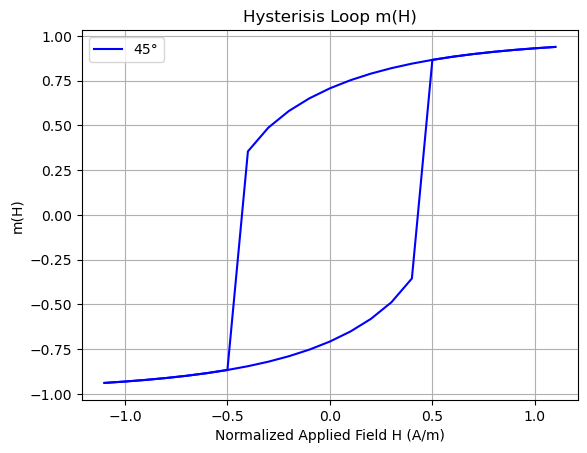

In [15]:
plt.plot(H, cosines, color[0])
plt.plot(H, symmetric_cos, color[0])
plt.grid()
plt.xlabel("Normalized Applied Field H (A/m)");
plt.title('Hysterisis Loop m(H)');
plt.ylabel('m(H)')
plt.legend(['45°'])

### Ερώτημα 2

Now we calculate the energy of the two given materials. The energy is calculated with the formula $Ε=-μ_0MHcos(θ-φ) + K_usin^2φ$.

>Material 1 - Soft material, Fe:<br><br> $K=48kJ/m^3$,<br> $A_{ex}=21pJ/m$,<br> $M_{s}=1700kA/m$

In [16]:
def energy (K, M, final, H, theta):
    E = []
    m0 = 4 * np.pi * (10 ** (-7))
    for i in range(len(final)):
        E.append(- m0 * Ms * 2 * K * H[i] * np.cos(theta - final[i]) + K * (np.sin(final[i]))**2)
    return np.array(E)

In [17]:
Ms = 1700 * (10 ** 3)
K = 48 * (10 ** 3)

final0 = np.array(final0)
E0a = energy(K, Ms, final0, H0, theta[0])

final, cosines, symmetric_cos = solutions(theta[4])
final = np.array(final)
E45a = energy(K, Ms, final, H, theta[4])

E90a = energy(K, Ms, final90, H, theta[-1])

C:\Users\grgsl\AppData\Local\Temp\ipykernel_16744\3219062638.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(sol3)


Text(0, 0.5, 'Energy (kJ)')

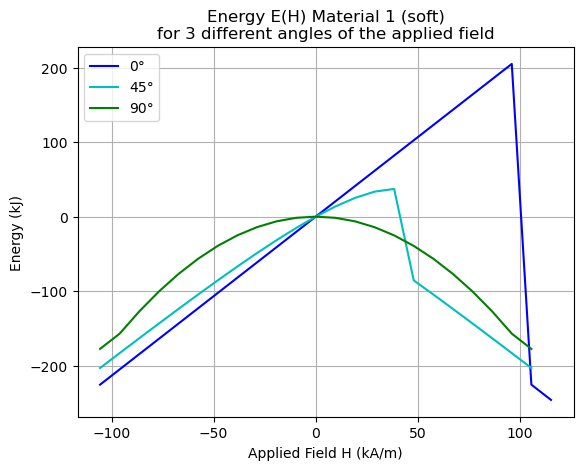

In [18]:
plt.plot(H0 * 2 * K/1000, E0a/1000, color[0])
plt.plot(H * 2 * K/1000, E45a/1000, color[1])
plt.plot(H * 2 * K/1000, E90a/1000, color[2])
plt.grid()
plt.legend(['0°', '45°', '90°'])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H) Material 1 (soft)\nfor 3 different angles of the applied field');
plt.ylabel('Energy (kJ)')

Material 1 - Soft


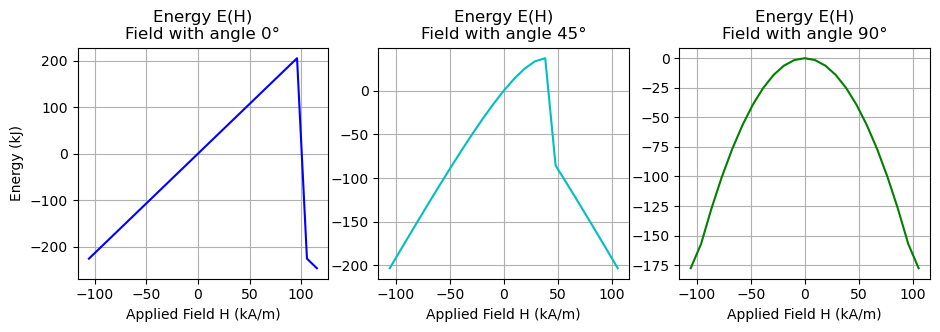

In [19]:
print("Material 1 - Soft")

plt.figure(figsize=(11,3))
plt.subplot(1, 3, 1)
plt.plot(H0 * 2 * K/1000, E0a/1000, color[0])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H)\nField with angle 0°');
plt.ylabel('Energy (kJ)')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(H * 2 * K/1000, E45a/1000, color[1])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H)\nField with angle 45°');
#plt.ylabel('Energy (kJ)')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(H * 2 * K/1000, E90a/1000, color[2])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H)\nField with angle 90°');
#plt.ylabel('Energy (kJ)')
plt.grid()

>Material 2 - Hard material, Rare-earth element:<br><br> $K=4500kJ/m^3$,<br> $A_{ex}=13pJ/m$,<br> $M_{s}=1280kA/m$

In [20]:
Ms = 1280 * (10 ** 3)
K = 4500 * (10 ** 3)

final0 = np.array(final0)
E0b = energy(K, Ms, final0, H0, theta[0])

final, cosines, symmetric_cos = solutions(theta[4])
final = np.array(final)
E45b = energy(K, Ms, final, H, theta[4])

E90b = energy(K, Ms, final90, H, theta[-1])

C:\Users\grgsl\AppData\Local\Temp\ipykernel_16744\3219062638.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(sol3)


Text(0, 0.5, 'Energy (kJ)')

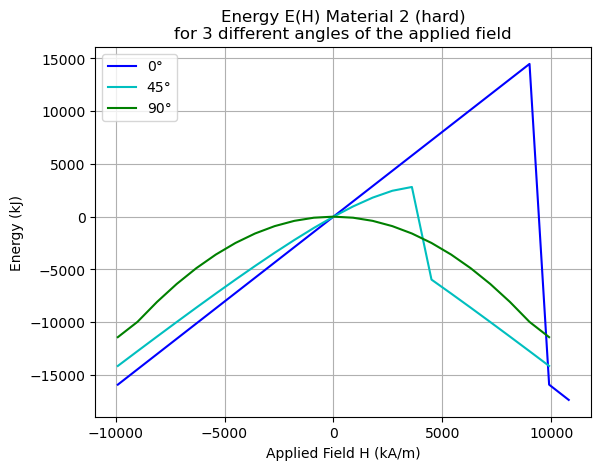

In [21]:
plt.plot(H0 * 2 * K/1000, E0b/1000, color[0])
plt.plot(H * 2 * K/1000, E45b/1000, color[1])
plt.plot(H * 2 * K/1000, E90b/1000, color[2])
plt.grid()
plt.legend(['0°', '45°', '90°'])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H) Material 2 (hard)\nfor 3 different angles of the applied field');
plt.ylabel('Energy (kJ)')

Material 2 - Hard


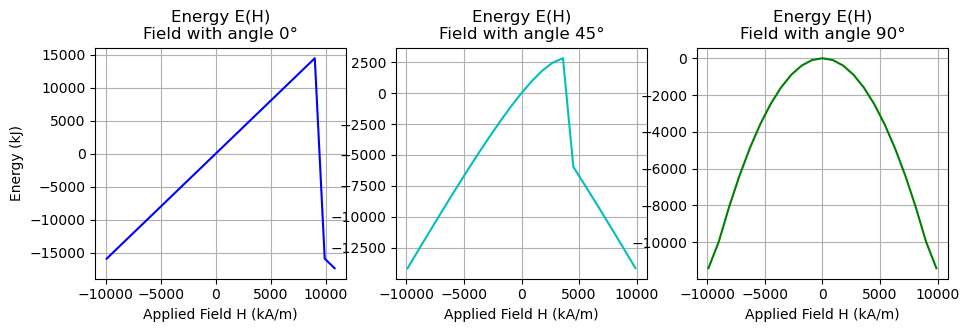

In [22]:
print("Material 2 - Hard")

plt.figure(figsize=(11,3))
plt.subplot(1, 3, 1)
plt.plot(H0 * 2 * K/1000, E0b/1000, color[0])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H)\nField with angle 0°');
plt.ylabel('Energy (kJ)')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(H * 2 * K/1000, E45b/1000, color[1])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H)\nField with angle 45°');
#plt.ylabel('Energy (kJ)')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(H * 2 * K/1000, E90b/1000, color[2])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H)\nField with angle 90°');
#plt.ylabel('Energy (kJ)')
plt.grid()

>Comparing the two Materials

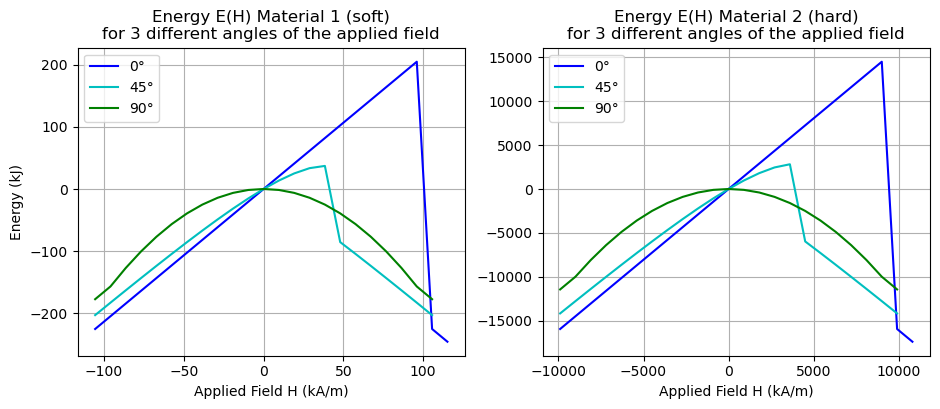

In [23]:
K = 48 * (10 ** 3)
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
plt.plot(H0 * 2 * K/1000, E0a/1000, color[0])
plt.plot(H * 2 * K/1000, E45a/1000, color[1])
plt.plot(H * 2 * K/1000, E90a/1000, color[2])
plt.grid()
plt.legend(['0°', '45°', '90°'])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H) Material 1 (soft)\nfor 3 different angles of the applied field');
plt.ylabel('Energy (kJ)')

K = 4500 * (10 ** 3)
plt.subplot(1, 2, 2)
plt.plot(H0 * 2 * K/1000, E0b/1000, color[0])
plt.plot(H * 2 * K/1000, E45b/1000, color[1])
plt.plot(H * 2 * K/1000, E90b/1000, color[2])
plt.grid()
plt.legend(['0°', '45°', '90°'])
plt.xlabel("Applied Field H (kA/m)");
plt.title('Energy E(H) Material 2 (hard)\nfor 3 different angles of the applied field');